In [102]:
# Import Libraries/Packages
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn

In [103]:
# Check Versions
print(sys.version)
print(np.__version__)
print(pd.__version__)
print(mpl.__version__)
print(sb.__version__)
print(sklearn.__version__)

3.7.7 (default, May  6 2020, 11:45:54) [MSC v.1916 64 bit (AMD64)]
1.18.1
1.0.3
3.1.3
0.10.1
0.22.1


In [104]:
# Read data from CSV file
games = pd.read_csv('dataset/board-games-review.csv')

In [105]:
# Check few sample data
games.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


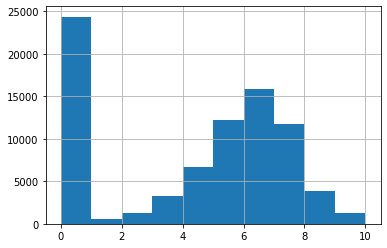

In [106]:
# Getting insight into the distribution of target data
games.average_rating.hist()

In [107]:
# ~25000 0 ratings. Check whether games go unrated by users.
games[games.users_rated==0]

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
13048,318,boardgame,Looney Leo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,1,0,0,0.0
13068,579,boardgame,Field of Fire,2002.0,2.0,0.0,0.0,0.0,0.0,12.0,0,0.0,0.0,2,0,0,1,0,0,0.0
13114,894,boardgame,LifeLinks,2000.0,1.0,8.0,10.0,10.0,10.0,8.0,0,0.0,0.0,2,0,1,1,0,0,0.0
13116,897,boardgame,Dear Abby,1992.0,3.0,4.0,60.0,60.0,60.0,13.0,0,0.0,0.0,7,1,0,0,0,0,0.0
13124,946,boardgame,Rolazone,1999.0,2.0,2.0,30.0,30.0,30.0,0.0,0,0.0,0.0,0,0,0,3,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81307,184441,boardgameexpansion,Micro Rome: Aegyptus,2015.0,1.0,1.0,0.0,30.0,0.0,10.0,0,0.0,0.0,0,0,0,0,0,0,0.0
81308,184442,boardgame,Trivial Pursuit: Marvel Cinematic Universe Da...,2013.0,2.0,0.0,0.0,0.0,0.0,12.0,0,0.0,0.0,0,0,0,0,0,0,0.0
81309,184443,boardgame,BEARanoia,2015.0,2.0,15.0,1.0,1.0,1.0,0.0,0,0.0,0.0,0,0,0,0,0,0,0.0
81310,184449,boardgame,Freight,2015.0,2.0,4.0,60.0,30.0,60.0,8.0,0,0.0,0.0,0,0,0,0,0,0,0.0


In [108]:
# Filter the dataset & remove rows with null value
games = games[games.users_rated > 0]
games = games.dropna(axis=0)

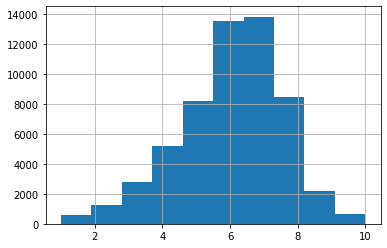

In [109]:
# Recheck distribution of target data
games.average_rating.hist(bins=10)

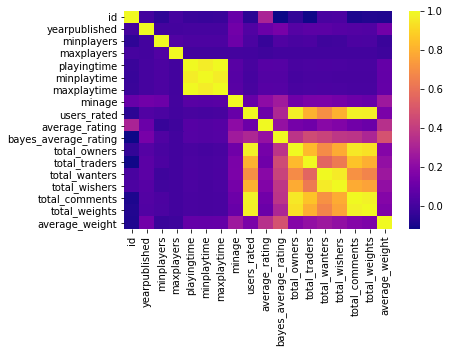

In [110]:
# Check correlation among different columns
corrmat = games.corr()
sb.heatmap(corrmat, cmap='plasma')

In [111]:
# Remove unwanted columns
columns = games.columns.to_list()
columns = [x for x in columns if x not in ['id','type','name','average_rating', 'bayes_average_rating']]
target = "average_rating"

In [112]:
# Create Train & Test data set
train = games.sample(frac=0.8, random_state=1)
test = games.loc[~games.index.isin(train.index)]

In [113]:
# Import Linear Regression Model & suared error metric
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize Model Class
LR = LinearRegression();

# Fit the training data into the model
LR.fit(train[columns],train[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [114]:
# Predict for test set
predictions = LR.predict(test[columns])
mean_squared_error(predictions, test[target])

2.078819032629326

In [115]:
# Import Random Forest Regressor model
from sklearn.ensemble import RandomForestRegressor

# Initialize Model Class
RFR = RandomForestRegressor(n_estimators=100, min_samples_leaf=10, random_state=1)

# Fit the training data into the model
RFR.fit(train[columns],train[target])

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [116]:
# Predict for test set
predictions = RFR.predict(test[columns])
mean_squared_error(predictions, test[target])

1.4458560046071653

In [117]:
# Check predicted rating value for a random row
rating_LR = LR.predict(test[columns].iloc[999].values.reshape(1,-1))
rating_RFR = RFR.predict(test[columns].iloc[999].values.reshape(1,-1))

In [118]:
print(rating_LR)
print(rating_RFR)

[7.17695682]
[7.11319249]


In [119]:
# Check actual rating
print(test[target].iloc[999])

7.80467
